In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter
import pickle
from scipy.signal import convolve


In [2]:
speeds = [0.27,0.81,1.62,3.24,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
speeds = [0.81]


# ACM monophasic

In [9]:
# load reversal

dataA = []
cell = 300

for s in speeds: 
    print(s)
    fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/ACM/ACM_slow_mono/w_GC/w_GC_0.0/reversing_{s}'
    with open(f'{fp}/out', 'rb') as handle:
        out = pickle.load(handle)    
        
    with open(f'{fp}/params', 'rb') as handle:
        paramsi = pickle.load(handle)

    duration = paramsi['duration']
    dt = paramsi['dt']
    #time = (np.arange(0,duration,dt)- params['tps_rf_GC_mid'][50])*1000
    time = np.arange(0,duration,dt) - (paramsi['spacing']*cell)/paramsi['speed']
    dataA.append([time,out['RG'][:]])

    if s == 0.81:
        outdA = out


0.81


In [10]:
# load smooth

dataAs = []
cell = 300

for s in speeds: 
    print(s)
    fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/ACM/ACM_slow_mono/w_GC/w_GC_0.0/smooth_{s}'
    with open(f'{fp}/out', 'rb') as handle:
        out = pickle.load(handle)    
        
    with open(f'{fp}/params', 'rb') as handle:
        paramsi = pickle.load(handle)

    duration = paramsi['duration']
    dt = paramsi['dt']
    #time = (np.arange(0,duration,dt)- params['tps_rf_GC_mid'][50])*1000
    time = np.arange(0,duration,dt)  - (paramsi['spacing']*cell)/paramsi['speed']#+45
    dataAs.append([time,out['RG'][:]])

    if s == 0.81:
        outdAs= out


0.81


# ACM biphasic

In [11]:
# load reversal
data = []
cell = 300

for s in speeds: 
    print(s)
    fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/ACM/ACM_slow_t/w_GC/w_GC_0.0/reversing_{s}'
    with open(f'{fp}/out', 'rb') as handle:
        out = pickle.load(handle)    
        
    with open(f'{fp}/params', 'rb') as handle:
        paramsi = pickle.load(handle)

    duration = paramsi['duration']
    dt = paramsi['dt']
    #time = (np.arange(0,duration,dt)- params['tps_rf_GC_mid'][50])*1000
    time = np.arange(0,duration,dt) - (paramsi['spacing']*cell)/paramsi['speed']
    data.append([time,out['RG'][:]])

    if s == 0.81:
        outd = out


0.81


In [12]:
# load smooth
datas = []
cell = 300

for s in speeds: 
    print(s)
    fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/ACM/ACM_slow_t/w_GC/w_GC_0.0/smooth_{s}'
    with open(f'{fp}/out', 'rb') as handle:
        out = pickle.load(handle)    
        
    with open(f'{fp}/params', 'rb') as handle:
        paramsi = pickle.load(handle)

    duration = paramsi['duration']
    dt = paramsi['dt']
    #time = (np.arange(0,duration,dt)- params['tps_rf_GC_mid'][50])*1000
    time = np.arange(0,duration,dt)  - (paramsi['spacing']*cell)/paramsi['speed']
    datas.append([time,out['RG'][:]])

    if s == 0.81:
        outds = out


0.81


# plot reversal  responses of mono and biphasic ACM

(-1.0, 1.0)

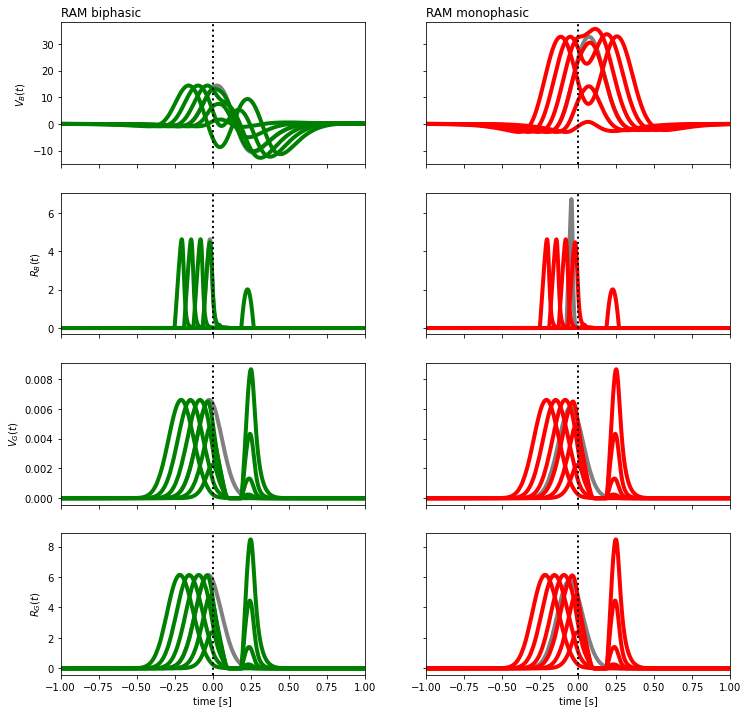

In [16]:
rev_pos = 300
dis = 10
lw = 4
c1 = 'green'
c2 = 'red'
c22 = 'grey'
c3 = 'blue'


fig,ax = plt.subplots(4,2,  figsize = (12,12), sharex = 'col', sharey = 'row')

ax[0,0].set_title('RAM biphasic', loc = 'left')
ax[0,1].set_title('RAM monophasic', loc = 'left')


# ax[0,0].plot(data[1][0],outd['inp'][:], color = c1, linewidth = lw)
# ax[0,0].plot(data[1][0],outd['F'][:], color = c1, linewidth = lw)

ax[0,0].set_ylabel('$V_{B}(t)$')
ax[0,0].plot(datas[0][0],outds['VB'][rev_pos,:], color = c22, linewidth = lw)
for i in range(-3,3):
    ax[0,0].plot(data[0][0],outd['VB'][rev_pos+i*dis,:], color = c1, linewidth = lw, label = f'{i*(dis*5)} mum')

ax[1,0].set_ylabel('$R_{B}(t)$')
ax[1,0].plot(datas[0][0], outds['RB'][300,:], color = c22, linewidth = lw)
for i in range(-3,3):
    ax[1,0].plot(data[0][0],outd['RB'][rev_pos+i*dis,:], color = c1, linewidth = lw)


ax[2,0].set_ylabel('$V_{G}(t)$')
ax[2,0].plot(datas[0][0], outds['VG'][300,:], color = c22, linewidth = lw)
for i in range(-3,3):
    ax[2,0].plot(data[0][0],outd['VG'][rev_pos+i*dis,:], color = c1, linewidth = lw)

ax[3,0].set_ylabel('$R_{G}(t)$')
ax[3,0].plot(datas[0][0], outds['RG'][300,:], color = c22, linewidth = lw)
for i in range(-3,3):
    ax[3,0].plot(data[0][0],outd['RG'][rev_pos+i*dis,:], color = c1, linewidth = lw)


    

# ax[0,1].plot(dataA[1][0],outdA['inp'][:], color = c2, linewidth = lw)
# ax[0,1].plot(dataA[1][0],outdA['F'][:], color = c2, linewidth = lw)
ax[0,1].plot(dataAs[0][0],outdAs['VB'][300,:], color = c22, linewidth = lw)
for i in range(-3,3):
    ax[0,1].plot(dataA[0][0],outdA['VB'][rev_pos+i*dis,:], color = c2, linewidth = lw, label = f'{i*(dis*5)} mum')

ax[1,1].plot(dataAs[0][0], outdAs['RB'][300,:], color = c22, linewidth = lw)
for i in range(-3,3):
    ax[1,1].plot(data[0][0],outd['RB'][rev_pos+i*dis,:], color = c2, linewidth = lw)


ax[2,1].plot(dataAs[0][0], outdAs['VG'][300,:], color = c22, linewidth = lw)
for i in range(-3,3):
    ax[2,1].plot(data[0][0],outd['VG'][rev_pos+i*dis,:], color = c2, linewidth = lw)

ax[3,1].plot(dataAs[0][0], outdAs['RG'][300,:], color = c22, linewidth = lw)
for i in range(-3,3):
    ax[3,1].plot(data[0][0],outd['RG'][rev_pos+i*dis,:], color = c2, linewidth = lw)



ax[0,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[1,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[2,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[3,1].axvline(0,linestyle = ':', color = 'k', linewidth =2 )


ax[0,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[1,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[2,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )
ax[3,0].axvline(0,linestyle = ':', color = 'k', linewidth =2 )


ax[-1,0].set_xlabel ('time [s]')
ax[-1,1].set_xlabel ('time [s]')
ax[-1,0].set_xlim(-1,1)
ax[-1,1].set_xlim(-1,1)